2.0.0-alpha0
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 21s 426us/sample - loss: 0.2849 - accuracy: 0.9152 - val_loss: 0.1686 - val_accuracy: 0.9521
Epoch 2/100
50000/50000 [==============================] - 21s 428us/sample - loss: 0.1511 - accuracy: 0.9545 - val_loss: 0.1395 - val_accuracy: 0.9593
Epoch 3/100
50000/50000 [==============================] - 21s 417us/sample - loss: 0.1210 - accuracy: 0.9644 - val_loss: 0.1515 - val_accuracy: 0.9615
Epoch 4/100
50000/50000 [==============================] - 21s 419us/sample - loss: 0.0979 - accuracy: 0.9705 - val_loss: 0.1190 - val_accuracy: 0.9671
Epoch 5/100
50000/50000 [==============================] - 21s 416us/sample - loss: 0.0848 - accuracy: 0.9743 - val_loss: 0.1270 - val_accuracy: 0.9672
Epoch 6/100
50000/50000 [==============================] - 21s 416us/sample - loss: 0.0753 - accuracy: 0.9773 - val_loss: 0.1178 - val_accuracy: 0.9689
Epoch 7/100
50000/50000 [

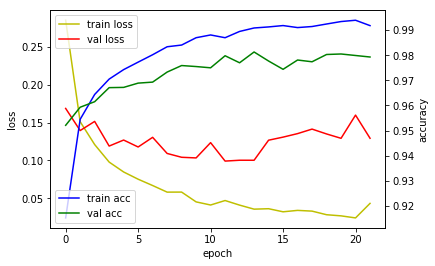

In [12]:
import tensorflow as tf
print(tf.__version__)
import tensorflow.keras.utils as utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

#6만개의 훈련데이터와 1만개의 테스트데이터를 구글에서 가져온다
width = 28
height = 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.reshape(60000, width*height).astype('float32')/255.0  # 28*28 정사각형 데이터를 1줄짜리 데이터로 바꾼다
x_test = x_test.reshape(10000, width*height).astype('float32')/255.0  # 정규화하기 위해 255로 나눈다

#6만개의 데이터 중
#5만개의 데이터를 훈련용 데이터로 쓰고
#1만개를 검증용 데이터로 쓴다
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

#정답을 카테고리화 한다
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

#입력은 28*28개의 픽셀데이터 
#출력은 0~9까지 10개
#딥러닝 레이어
model = Sequential()
model.add(Dense(units=1024, input_dim=width*height, activation='elu'))
model.add(Dense(units=512, activation='elu'))
model.add(Dense(units=256, activation = 'elu'))
model.add(Dense(units=128, activation = 'elu'))
model.add(Dense(units=10, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=10)

#딥러닝 실행
hist = model.fit(x_train, y_train, epochs=100, batch_size=30, verbose=1, validation_data=(x_val, y_val), callbacks=[early_stopping])

#결과 출력
#모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [11]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=30)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuray : ' + str(loss_and_metrics[1]))

10000/10000 [==============================] - 1s 100us/sample - loss: 0.1047 - accuracy: 0.9767

loss : 0.10473603581385096
accuray : 0.9767


In [13]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=30)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuray : ' + str(loss_and_metrics[1]))

10000/10000 [==============================] - 1s 101us/sample - loss: 0.1157 - accuracy: 0.9800

loss : 0.11569067166885065
accuray : 0.98


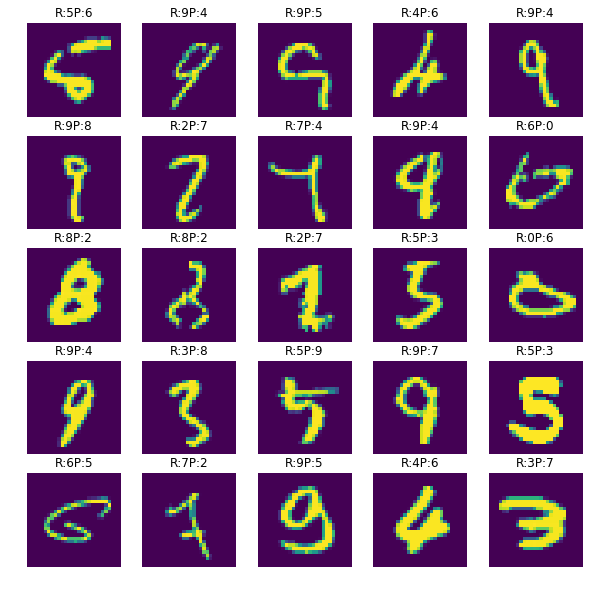

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10, 10)
f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):
    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue
    sub_plt = axarr[int(cnt/plt_row), int(cnt%plt_col)]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title='R:'+str(np.argmax(y_test[i]))+'P:'+str(np.argmax(yhat_test[i]))
    sub_plt.set_title(sub_plt_title)
    i += 1
    cnt += 1
plt.show()
print(y_test[1])

2.0.0-alpha0
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 20s 402us/sample - loss: 0.2907 - accuracy: 0.9127 - val_loss: 0.1728 - val_accuracy: 0.9469
Epoch 2/100
50000/50000 [==============================] - 20s 395us/sample - loss: 0.1552 - accuracy: 0.9532 - val_loss: 0.1271 - val_accuracy: 0.9620
Epoch 3/100
50000/50000 [==============================] - 19s 390us/sample - loss: 0.1188 - accuracy: 0.9649 - val_loss: 0.1155 - val_accuracy: 0.9672
Epoch 4/100
50000/50000 [==============================] - 19s 390us/sample - loss: 0.0970 - accuracy: 0.9712 - val_loss: 0.1014 - val_accuracy: 0.9714
Epoch 5/100
50000/50000 [==============================] - 21s 418us/sample - loss: 0.0872 - accuracy: 0.9748 - val_loss: 0.1108 - val_accuracy: 0.9703
Epoch 6/100
50000/50000 [==============================] - 21s 414us/sample - loss: 0.0725 - accuracy: 0.9788 - val_loss: 0.1289 - val_accuracy: 0.9636
Epoch 7/100
50000/50000 [

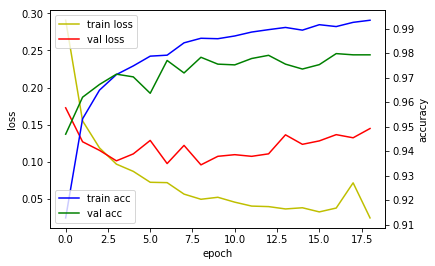

In [20]:
import tensorflow as tf
print(tf.__version__)
import tensorflow.keras.utils as utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

#6만개의 훈련데이터와 1만개의 테스트데이터를 구글에서 가져온다
width = 28
height = 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.reshape(60000, width*height).astype('float32')/255.0  # 28*28 정사각형 데이터를 1줄짜리 데이터로 바꾼다
x_test = x_test.reshape(10000, width*height).astype('float32')/255.0  # 정규화하기 위해 255로 나눈다

#6만개의 데이터 중
#5만개의 데이터를 훈련용 데이터로 쓰고
#1만개를 검증용 데이터로 쓴다
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

#정답을 카테고리화 한다
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

#입력은 28*28개의 픽셀데이터 
#출력은 0~9까지 10개
#딥러닝 레이어
model = Sequential()
model.add(Dense(units=1024, input_dim=width*height, activation='elu'))
model.add(Dense(units=512, activation='elu'))
model.add(Dense(units=256, activation = 'elu'))
model.add(Dense(units=128, activation = 'elu'))
model.add(Dense(units=10, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=10)

#딥러닝 실행
hist = model.fit(x_train, y_train, epochs=100, batch_size=30, verbose=1, validation_data=(x_val, y_val), callbacks=[early_stopping])

#결과 출력
#모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [19]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=30)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuray : ' + str(loss_and_metrics[1]))

10000/10000 [==============================] - 1s 107us/sample - loss: 0.2622 - accuracy: 0.9775

loss : 0.262171012861065
accuray : 0.9775


In [25]:
import tensorflow as tf
print(tf.__version__)
import tensorflow.keras.utils as utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

dataset = np.loadtxt("C:/Users/IoT08/Documents/20190926/pima-indians-diabetes.csv", delimiter=",")

2.0.0-alpha0
